In [2]:
import matplotlib.pyplot as plt
from Bio import SeqIO
from Bio import pairwise2
from Levenshtein import distance
from collections import Counter
from Bio.SeqUtils import MeltingTemp as mt, gc_fraction
from Bio.SeqUtils import molecular_weight as mw
from Bio.pairwise2 import format_alignment
from Bio.SeqUtils import nt_search


Bad key text.latex.preview in file /Users/macbookdanda/anaconda3/lib/python3.11/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.2/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/macbookdanda/anaconda3/lib/python3.11/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.2/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/macbookdanda/anaconda3/lib/python3.11/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_qualit

In [3]:
x = SeqIO.read('x.fasta','fasta')

print(x.id)
print(x.description)
print(x.seq)

XM_006779407.2
XM_006779407.2 PREDICTED: Myotis davidii seryl-tRNA synthetase (SARS), mRNA
ATGGTGTTGGATCTGGACTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGCATCCGAGAGACGCAAAAGAACCGCTTCAAGGACCCGGGACTCGTGGATCGGCTGGTGAAGGCGGACGGCGAGTGGCGAAAATGCAGATTTCAGACCGACAACTTGAACAAGCTGAAGAACCTATGCAGCAAGACAATTGGAGAGAAAATGAAGAAAAAAGAGCCAGTGGGAAATGATGAGTCCATTCCGGAGAACTTGTTAAATCTCGATGACCTCACTTCAGACACTTTAGCTAACCTGAAAGTGTCACAGATCAAAAAACTCCGACTCCTCATCGACGAAGCCATCCTGAAGTGTGACGCCCAGCGGATAAAGCTGCAGGAATAGCGGTTTGAGAACCTCCGCGAGNNNNNNNNNNNNNNNNNNCTGCATCCCTCGGTGCCCATCAGTAACGATGAGGATGCGGACAACAAAGTCGAGAGGATCTGGGGTGACTGCACCGTCAAGAAGAAGTACTCGCACGTGGACCTGGTGGTGATGGTCGATGGCTTTGAAGGCGAAAAAGGGGTCGTGGTGGCTGGCAGTCGAGGGTACTTCCTGAAGGGGCCCCTGGTGTTCCTGGAACAGGCGCTCATCCAGTACGCCCTTCGCACCTTGGGAAGTCGGGGCTACATTCCCATTTACACCCCGTTTTTCATGAGGAAGGAGGTCATGCAGGAGGTGGCACAGCTCAGCCAGTTTGATGAAGAGCTTTACAAGGTGATTGGCAAAGGCAGTGAAAAGTCTGACGACAACTCCTACGATGAGAAATACCTGATTGCCACCTCCGAGCAGCCCATCGCTGCTCTCCACCGAGATGAGTGGCTACGGCCAGAGGATTTGCCCATCAAGTATGCTGGCCTGTCCACCTGCTTT

In [4]:
y = SeqIO.read('y.fasta', 'fasta')

print(y.id)
print(y.description)
print(y.seq)

OV986001.1
OV986001.1 Pseudomonas fluorescens SBW25 genome assembly, chromosome: 1
GTGTCAGTGGAACTTTGGCAGCAGTGCGTGGAGCTTTTGCGCGATGAGCTGCCTGCCCAGCAATTCAACACCTGGATCCGTCCACTACAGGTCGAAGCCGAAGGCGACGAGTTGCGTGTTTACGCGCCCAATCGTTTTGTTCTCGACTGGGTCAACGAGAAGTACCTGAGCCGCGTGCTCGAATTGCTCGATGAACACGGCAACGGCCTCGCACCCGTGCTCTCCTTATTAATAGGCAGCAAACGTAGCTCCGCACCTCGTGCTGCGCCGAACGCGCCATTGGCCGCTGCTGCGTCGCAAGCCCAGGCGGCACCGGTTGCCAGTACACCTGCACCGGCTCCTTCCAAATCGTCTGCGAAGAAAAATGCAGCCGAGAATGAAGAACCGTCGCGCGATAGCTTCGACCCGATGGCCGGTGCCAGCTCCCAGCAAGCCCCGATCCGTGCCGAACAGCGCACCGTTCAGGTTGAAGGTGCGCTCAAGCACACCAGCTACCTGAACCGCACGTTCACGTTCGAGAATTTCGTCGAAGGTAAATCCAACCAGCTGGCTCGTGCAGCCGCCTGGCAGGTCGCCGACAACCCCAAGCACGGTTACAACCCTCTCTTCCTTTATGGTGGCGTCGGCTTGGGTAAGACTCACTTGATGCACGCTGTGGGTAACCACCTATTAAAGAAGAACCCGAATGCCAAGGTCGTGTACCTGCACTCGGAGCGCTTCGTGGCTGACATGGTCAAGGCCCTGCAGCTCAATGCCATCAATGAATTCAAGCGTTTCTACCGCTCGGTTGATGCGTTGCTGATCGATGACATTCAATTCTTTGCCCGTAAAGAGCGTTCCCAGGAAGAGTTTTTCCATACCTTCAACGCCCTGCTCGAAGGTGGCCAGCAGGTCATCTTGACCAGTGACCGTTATCC

In [5]:
SeqX = x.seq.replace("N", "")
print('new SeqX =', SeqX)

new SeqX = ATGGTGTTGGATCTGGACTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGCATCCGAGAGACGCAAAAGAACCGCTTCAAGGACCCGGGACTCGTGGATCGGCTGGTGAAGGCGGACGGCGAGTGGCGAAAATGCAGATTTCAGACCGACAACTTGAACAAGCTGAAGAACCTATGCAGCAAGACAATTGGAGAGAAAATGAAGAAAAAAGAGCCAGTGGGAAATGATGAGTCCATTCCGGAGAACTTGTTAAATCTCGATGACCTCACTTCAGACACTTTAGCTAACCTGAAAGTGTCACAGATCAAAAAACTCCGACTCCTCATCGACGAAGCCATCCTGAAGTGTGACGCCCAGCGGATAAAGCTGCAGGAATAGCGGTTTGAGAACCTCCGCGAGCTGCATCCCTCGGTGCCCATCAGTAACGATGAGGATGCGGACAACAAAGTCGAGAGGATCTGGGGTGACTGCACCGTCAAGAAGAAGTACTCGCACGTGGACCTGGTGGTGATGGTCGATGGCTTTGAAGGCGAAAAAGGGGTCGTGGTGGCTGGCAGTCGAGGGTACTTCCTGAAGGGGCCCCTGGTGTTCCTGGAACAGGCGCTCATCCAGTACGCCCTTCGCACCTTGGGAAGTCGGGGCTACATTCCCATTTACACCCCGTTTTTCATGAGGAAGGAGGTCATGCAGGAGGTGGCACAGCTCAGCCAGTTTGATGAAGAGCTTTACAAGGTGATTGGCAAAGGCAGTGAAAAGTCTGACGACAACTCCTACGATGAGAAATACCTGATTGCCACCTCCGAGCAGCCCATCGCTGCTCTCCACCGAGATGAGTGGCTACGGCCAGAGGATTTGCCCATCAAGTATGCTGGCCTGTCCACCTGCTTTCGCCAGGAGGTGGGCTCCCACGGCCGGGACACCCGCGGCATCTTCCGAGTCCATCAGTTTGAGAAGATCGAGCAGTTTGTCTACGCGTCACCACATGA

In [6]:
SeqY = y.seq
print ("Seq Y =", SeqY)

Seq Y = GTGTCAGTGGAACTTTGGCAGCAGTGCGTGGAGCTTTTGCGCGATGAGCTGCCTGCCCAGCAATTCAACACCTGGATCCGTCCACTACAGGTCGAAGCCGAAGGCGACGAGTTGCGTGTTTACGCGCCCAATCGTTTTGTTCTCGACTGGGTCAACGAGAAGTACCTGAGCCGCGTGCTCGAATTGCTCGATGAACACGGCAACGGCCTCGCACCCGTGCTCTCCTTATTAATAGGCAGCAAACGTAGCTCCGCACCTCGTGCTGCGCCGAACGCGCCATTGGCCGCTGCTGCGTCGCAAGCCCAGGCGGCACCGGTTGCCAGTACACCTGCACCGGCTCCTTCCAAATCGTCTGCGAAGAAAAATGCAGCCGAGAATGAAGAACCGTCGCGCGATAGCTTCGACCCGATGGCCGGTGCCAGCTCCCAGCAAGCCCCGATCCGTGCCGAACAGCGCACCGTTCAGGTTGAAGGTGCGCTCAAGCACACCAGCTACCTGAACCGCACGTTCACGTTCGAGAATTTCGTCGAAGGTAAATCCAACCAGCTGGCTCGTGCAGCCGCCTGGCAGGTCGCCGACAACCCCAAGCACGGTTACAACCCTCTCTTCCTTTATGGTGGCGTCGGCTTGGGTAAGACTCACTTGATGCACGCTGTGGGTAACCACCTATTAAAGAAGAACCCGAATGCCAAGGTCGTGTACCTGCACTCGGAGCGCTTCGTGGCTGACATGGTCAAGGCCCTGCAGCTCAATGCCATCAATGAATTCAAGCGTTTCTACCGCTCGGTTGATGCGTTGCTGATCGATGACATTCAATTCTTTGCCCGTAAAGAGCGTTCCCAGGAAGAGTTTTTCCATACCTTCAACGCCCTGCTCGAAGGTGGCCAGCAGGTCATCTTGACCAGTGACCGTTATCCGAAAGAGATCGAAGGTCTGGAAGAACGCCTGAAATCGCGTTTCGGCTGGGGCCTGACTGTTGCAGTAGAGCCGCC

In [7]:
LenX = len(SeqX)
LenY = len(SeqY)

print(LenX)
print(LenY)

1865
1050


In [8]:
CGC_inX = SeqX.find("CGC")
CGC_inY = SeqY.find("CGC")

print(CGC_inX)
print(CGC_inY)

51
39


In [9]:
SeqC = SeqX[:10:1]+SeqX[-5::1]
SeqD = SeqY[:20:1]+SeqY[-3::1]

print("C =", SeqC)
print("D =", SeqD)

C = ATGGTGTTGGAGTCA
D = GTGTCAGTGGAACTTTGGCAGAC


In [10]:
Z = SeqC + SeqD
SeqZ = Z[::-1]

print("Z =", SeqZ)
print(len(SeqZ))

Z = CAGACGGTTTCAAGGTGACTGTGACTGAGGTTGTGGTA
38


In [11]:
listA = nt_search(str(SeqZ),'A')
listA

['A', 1, 3, 11, 12, 17, 23, 27, 37]

<function matplotlib.pyplot.show(close=None, block=None)>

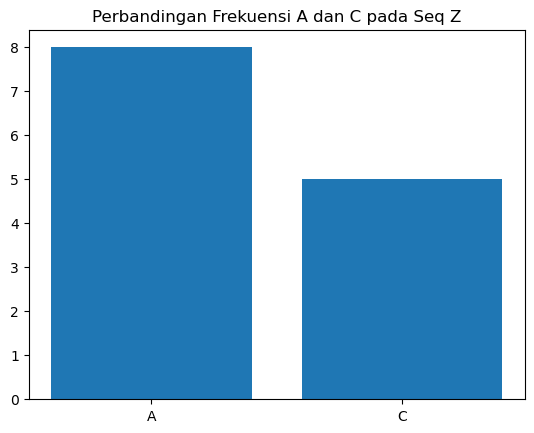

In [12]:
freqA = SeqZ.count("A")
freqC = SeqZ.count("C")

plt.bar(['A', 'C'],[freqA, freqC])
plt.title("Perbandingan Frekuensi A dan C pada Seq Z")
plt.show

In [13]:
gc_content = gc_fraction(SeqZ)
at_content = 1 - gc_fraction(SeqZ)

print("GC Content =" ,gc_content)
print("AT Content =" ,at_content) 

GC Content = 0.5
AT Content = 0.5


In [14]:
def GCComposition(seq):
    countG = seq.count("G")
    countC = seq.count("C")
    return (countG + countC) / len(seq) * 100

print("GC Composition", round(GCComposition(SeqZ), 2), "%")
print("AT Composition", 100 - round(GCComposition(SeqZ), 2), "%")

GC Composition 50.0 %
AT Composition 50.0 %


<function matplotlib.pyplot.show(close=None, block=None)>

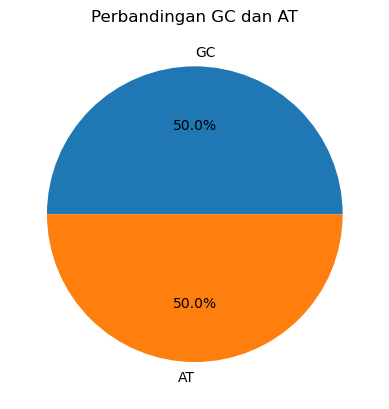

In [15]:
plt.pie([gc_content, at_content], labels=['GC', 'AT'] , autopct='%.1f%%')
plt.title("Perbandingan GC dan AT")
plt.show

In [16]:
mt_seqZ = mt.Tm_Wallace(SeqZ)
mw_seqZ = mw(SeqZ)

print("mt =", mt_seqZ)
print("mw =", mw_seqZ)

mt = 114.0
mw = 11924.584100000002


In [17]:
mRNA = SeqZ.transcribe()
print("mRNA =", mRNA)

a_acid = SeqZ.translate()
print("amino acid =", a_acid)

mRNA = CAGACGGUUUCAAGGUGACUGUGACUGAGGUUGUGGUA
amino acid = QTVSR*L*LRLW


/Users/macbookdanda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [18]:
local_alignment = pairwise2.align.localxx(SeqX, SeqY)

for a in local_alignment:
    print(format_alignment(*a))

6 GTTGGATC--TGGA-CTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGCATCCGAGAGACGCAAAAGAACCGCTTCAAGGACCCGGGACTCGTGGATCGGCTGGTGAAGGCGGACGGCGAGTG-GCGAAAATGCAGATTTCA-GACCG-A-CAACTTG-AACAAGC-TGAAGAA-CCTATG-CAGCAAGACAATTGGAG-AGAAAATGAA--GAAAAAAGAGCCAGTGGGAAATGATGAGTCC-ATTCCGGAGAACTTGTTAAATCTCGATGACCTCACTTCAGACA-CTTTAGCTAACCTGAAAGT-GTCACA---GATCAAAAAACTC-CGACTCC---TCAT-CGACGAAGCCAT-CCTGAAGTGTGACGCCCAGCGGATAAAGCTGCAGGAATA-GCGGTTT-GA-GAACCTC-CGCG-A--G-C-T-GCATCCCTCGGTGCC-CATCAG-T-A--ACGATGAGG-ATGCGGACAACAAAGTCGAGAGGATCTGGGGTGACT-GCACCGTCAAGAAGAAGTACTCGCACGTG-GACCTGGTGGTGATGGTCGAT-G-GCT--TTGAAGGCGAAAAAGGGGTCGTGG-TGGCTGGCAGTCGAGGGTACTTCCTGAAGGGGCCCCTG-GTGTTCCTGGAACAGGCGC--TCAT-CCAGTACGC-CCTTCGCACCTTGGGAAGTCGGGGCTACA-TTCCCATTTACACCC-CGTTTTTCATGAG-GAAGGAGGTCATGCAGGAGG-TGGCACAGCTCAGCCAGTTTGA-TGAAGAGCTTTACAAGGT-GATTGGCAAAGGCAGT-GAAA-AGTCTGA-CGACAACTCCTACGATGAGAAATACCTGAT-TGCCAC-CTCCG-AGCA-GCCCATCGC-TGCTC-TCCA-CCGAGATG-AGTG-GCTACGGCCAG---AGGATTTGCCCATCAAGTATGCTGGCCTGTC-CACCT-GCTTT-CG-CCAGGAGGTGGGCTCCCACGGCCGG-GACAC

In [19]:
global_alignment = pairwise2.align.globalxx(SeqY, SeqZ)

for a in global_alignment:
    print(format_alignment(*a))

GTGTCAGTGGAACTTTGGCAGCAGTGCGTGGAGCTTTTGCGCGATGAGCTGCCTGCCCAGCAATTCAACACCTGGATCCGTCCACTACAGGTCGAAGCCGAAGGCGACGAGTTGCGTGTTTACGCGCCCAATCGTTTTGTTCTCGACTGGGTCAACGAGAAGTACCTGAGCCGCGTGCTCGAATTGCTCGATGAACACGGCAACGGCCTCGCACCCGTGCTCTCCTTATTAATAGGCAGCAAACGTAGCTCCGCACCTCGTGCTGCGCCGAACGCGCCATTGGCCGCTGCTGCGTCGCAAGCCCAGGCGGCACCGGTTGCCAGTACACCTGCACCGGCTCCTTCCAAATCGTCTGCGAAGAAAAATGCAGCCGAGAATGAAGAACCGTCGCGCGATAGCTTCGACCCGATGGCCGGTGCCAGCTCCCAGCAAGCCCCGATCCGTGCCGAACAGCGCACCGTTCAGGTTGAAGGTGCGCTCAAGCACACCAGCTACCTGAACCGCACGTTCACGTTCGAGAATTTCGTCGAAGGTAAATCCAACCAGCTGGCTCGTGCAGCCGCCTGGCAGGTCGCCGACAACCCCAAGCACGGTTACAACCCTCTCTTCCTTTATGGTGGCGTCGGCTTGGGTAAGACTCACTTGATGCACGCTGTGGGTAACCACCTATTAAAGAAGAACCCGAATGCCAAGGTCGTGTACCTGCACTCGGAGCGCTTCGTGGCTGACATGGTCAAGGCCCTGCAGCTCAATGCCATCAATGAATTCAAGCGTTTCTACCGCTCGGTTGATGCGTTGCTGATCGATGACATTCAATTCTTTGCCCGTAAAGAGCGTTCCCAGGAAGAGTTTTTCCATACCTTCAACGCCCTGCTCGAAGGTGGCCAGCAGGTCATCTTGACCAGTGACCGTTATCCGAAAGAGATCGAAGGTCTGGAAGAACGCCTGAAATCGCGTTTCGGCTGGGGCCTGACTGTTGCAGTAGAGCCGCCGGAGCTCG

In [20]:
lev = distance(SeqX, SeqY)
print(lev)

1028


In [21]:
def function (SeqX, SeqY):
    h = []
    for x,y in zip (SeqX, SeqY):
        if (x != y):
            h.append((x,y))
    return len(h)

ham = function(SeqX, SeqY)
print(ham)

755
